In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# オリジナル画像を表示する

(810, 2370)


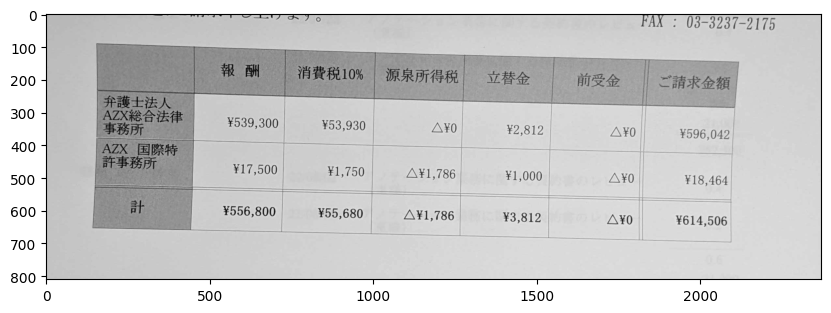

In [15]:
img = cv2.imread('src/表抽出課題.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.figure(figsize=[10, 6])
plt.imshow(img, 'gray')

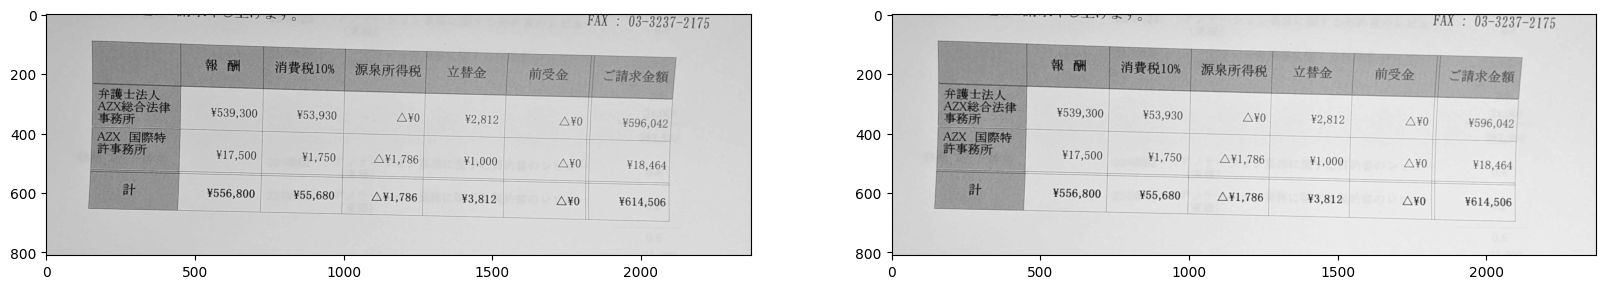

In [16]:
# blur処理をして画像が見やすくなるか検証（効果はあまり出ず）
img_blur = cv2.GaussianBlur(img, (3,3), 0) 
plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.subplot(1, 2, 2), plt.imshow(img_blur, 'gray')
plt.show()

# 前処理：明るさ調整
- オリジナル画像のままだと明るさにばらつきがあったり、文字や線の色も不均一である
- 従って白い背景はより白く、黒字はより黒くなるようにClip処理を行う

## 現状の明るさヒストグラムを取得

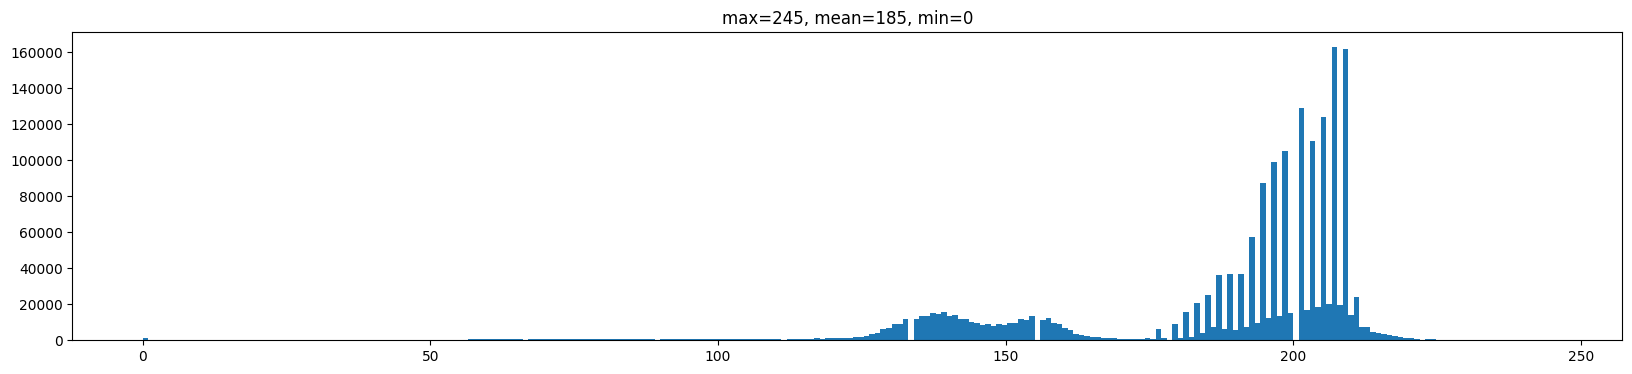

In [17]:
plt.figure(figsize=[20, 4])
plt.hist(img.reshape(-1), bins=256)
plt.title(f"max={img.max()}, mean={img.mean():.0f}, min={img.min()}")
plt.show()

- 170以上の部分が白背景部分と考えられる
- また、概ね120以下の部分が線や文字情報の黒線情報と考えられる

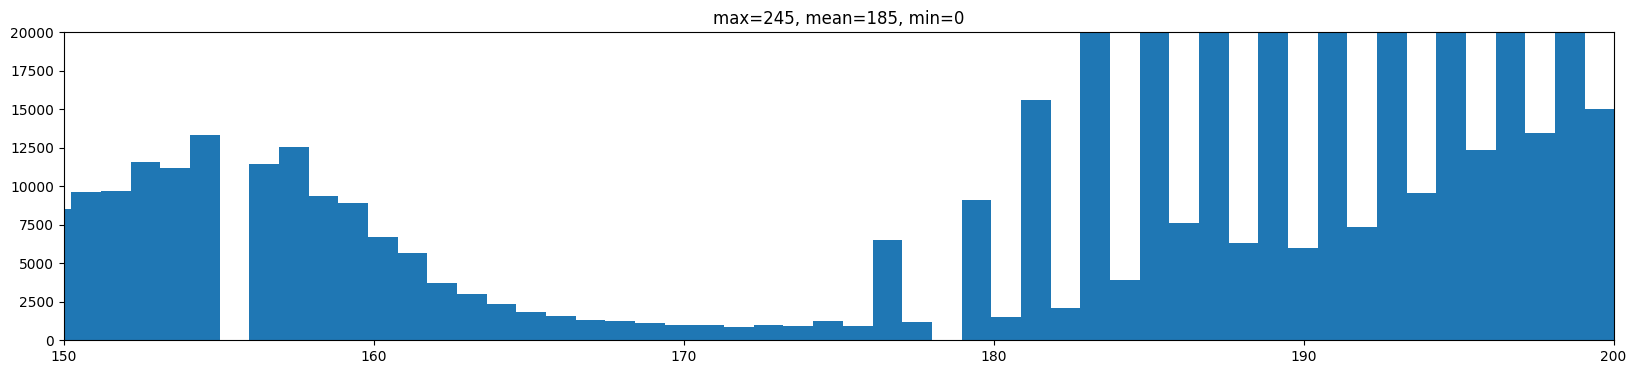

In [18]:
# 170以上の部分を拡大表示
plt.figure(figsize=[20, 4])
plt.hist(img.reshape(-1), bins=256)
plt.ylim([0, 20000])
plt.xlim([150, 200])
plt.title(f"max={img.max()}, mean={img.mean():.0f}, min={img.min()}")
plt.show()

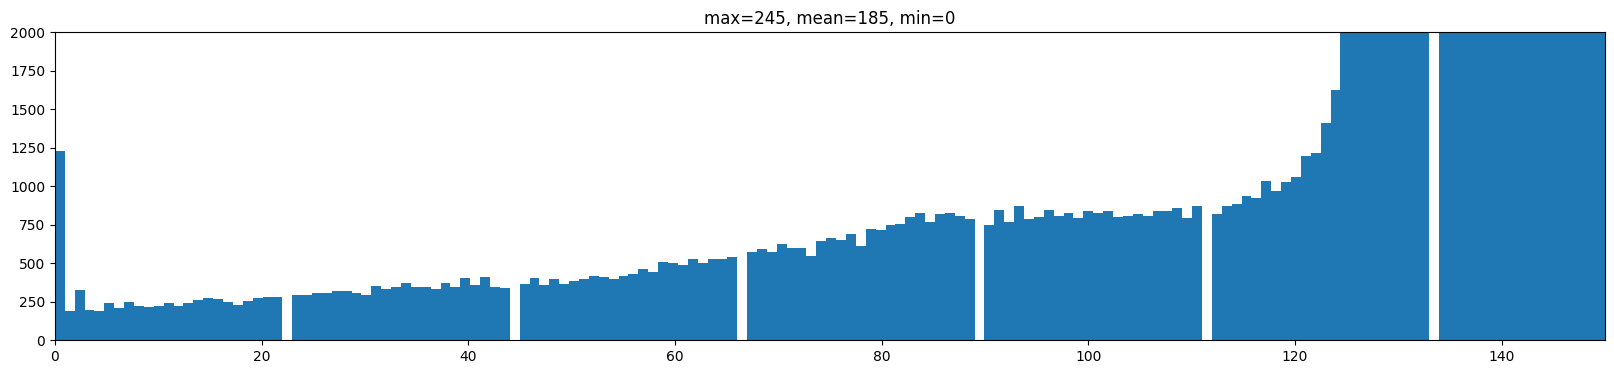

In [19]:
# 150以下の部分を拡大表示
plt.figure(figsize=[20, 4])
plt.hist(img.reshape(-1), bins=256)
plt.xlim([0, 150])
plt.ylim([0, 2000])
plt.title(f"max={img.max()}, mean={img.mean():.0f}, min={img.min()}")
plt.show()

- 上限の閾値を173, 下限の閾値を120と決めて前処理実行

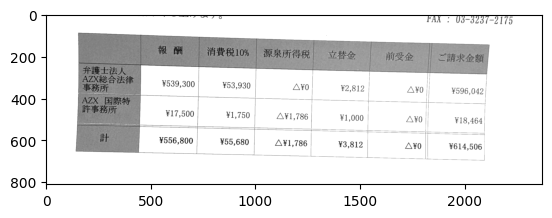

In [20]:
img = np.array(img)
thre = 173
img = np.where(img>thre, 255, img)
plt.imshow(img, 'gray')
plt.show()

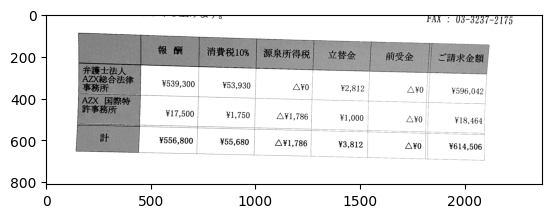

In [21]:
thre = 110
img = np.where(img<thre, 0, img)
plt.imshow(img, 'gray')
plt.show()

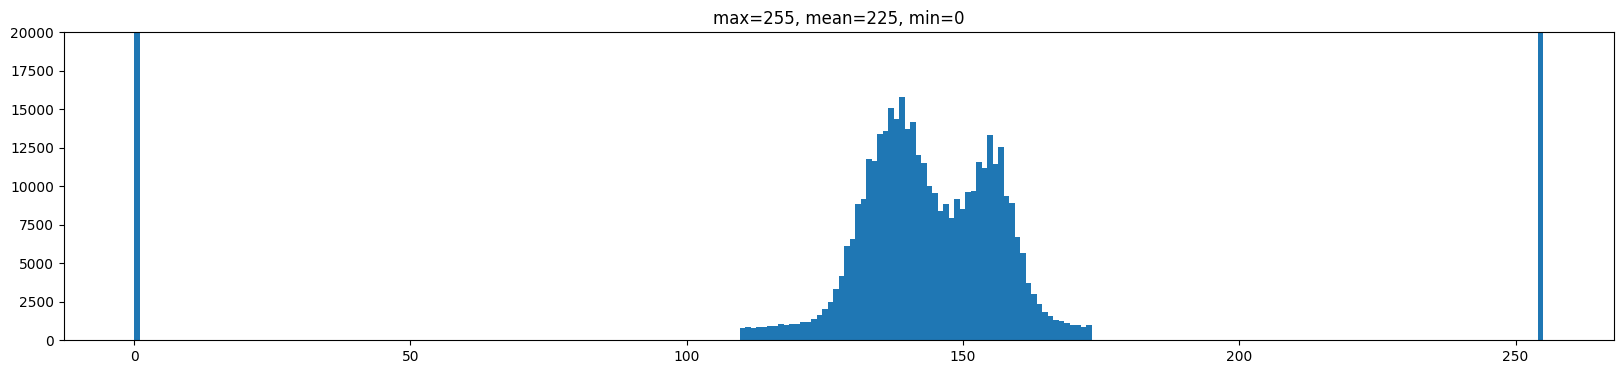

In [22]:
plt.figure(figsize=[20, 4])
plt.hist(img.reshape(-1), bins=256)
plt.ylim([0, 20000])
plt.title(f"max={img.max()}, mean={img.mean():.0f}, min={img.min()}")
plt.show()

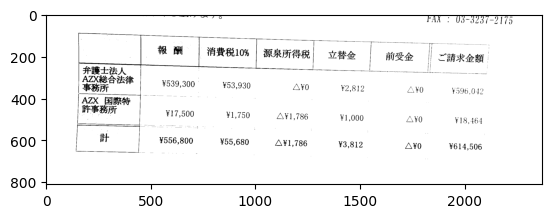

In [23]:
# 間の部分はほとんどグレー背景なので、無視しても良さそうであるが、消去すると線情報も消えてしまうので残しておく
thre = 120
img_test = np.where(img>thre, 255, img)
plt.imshow(img_test, 'gray')
plt.show()

# 前処理：エッジ検出

## Tableの線情報を検知しやすくするためにcv2.Cannyを用いてエッジ検出する

(参考)：https://qiita.com/Takarasawa_/items/1556bf8e0513dca34a19

image – 8ビット，シングルチャンネルの入力画像

edges – 出力されるエッジのマップ． image と同じサイズ，同じ型です

threshold1 – ヒステリシスが存在する処理の，1番目の閾値

threshold2 – ヒステリシスが存在する処理の，2番目の閾値

apertureSize – Sobel() オペレータのアパーチャサイズ

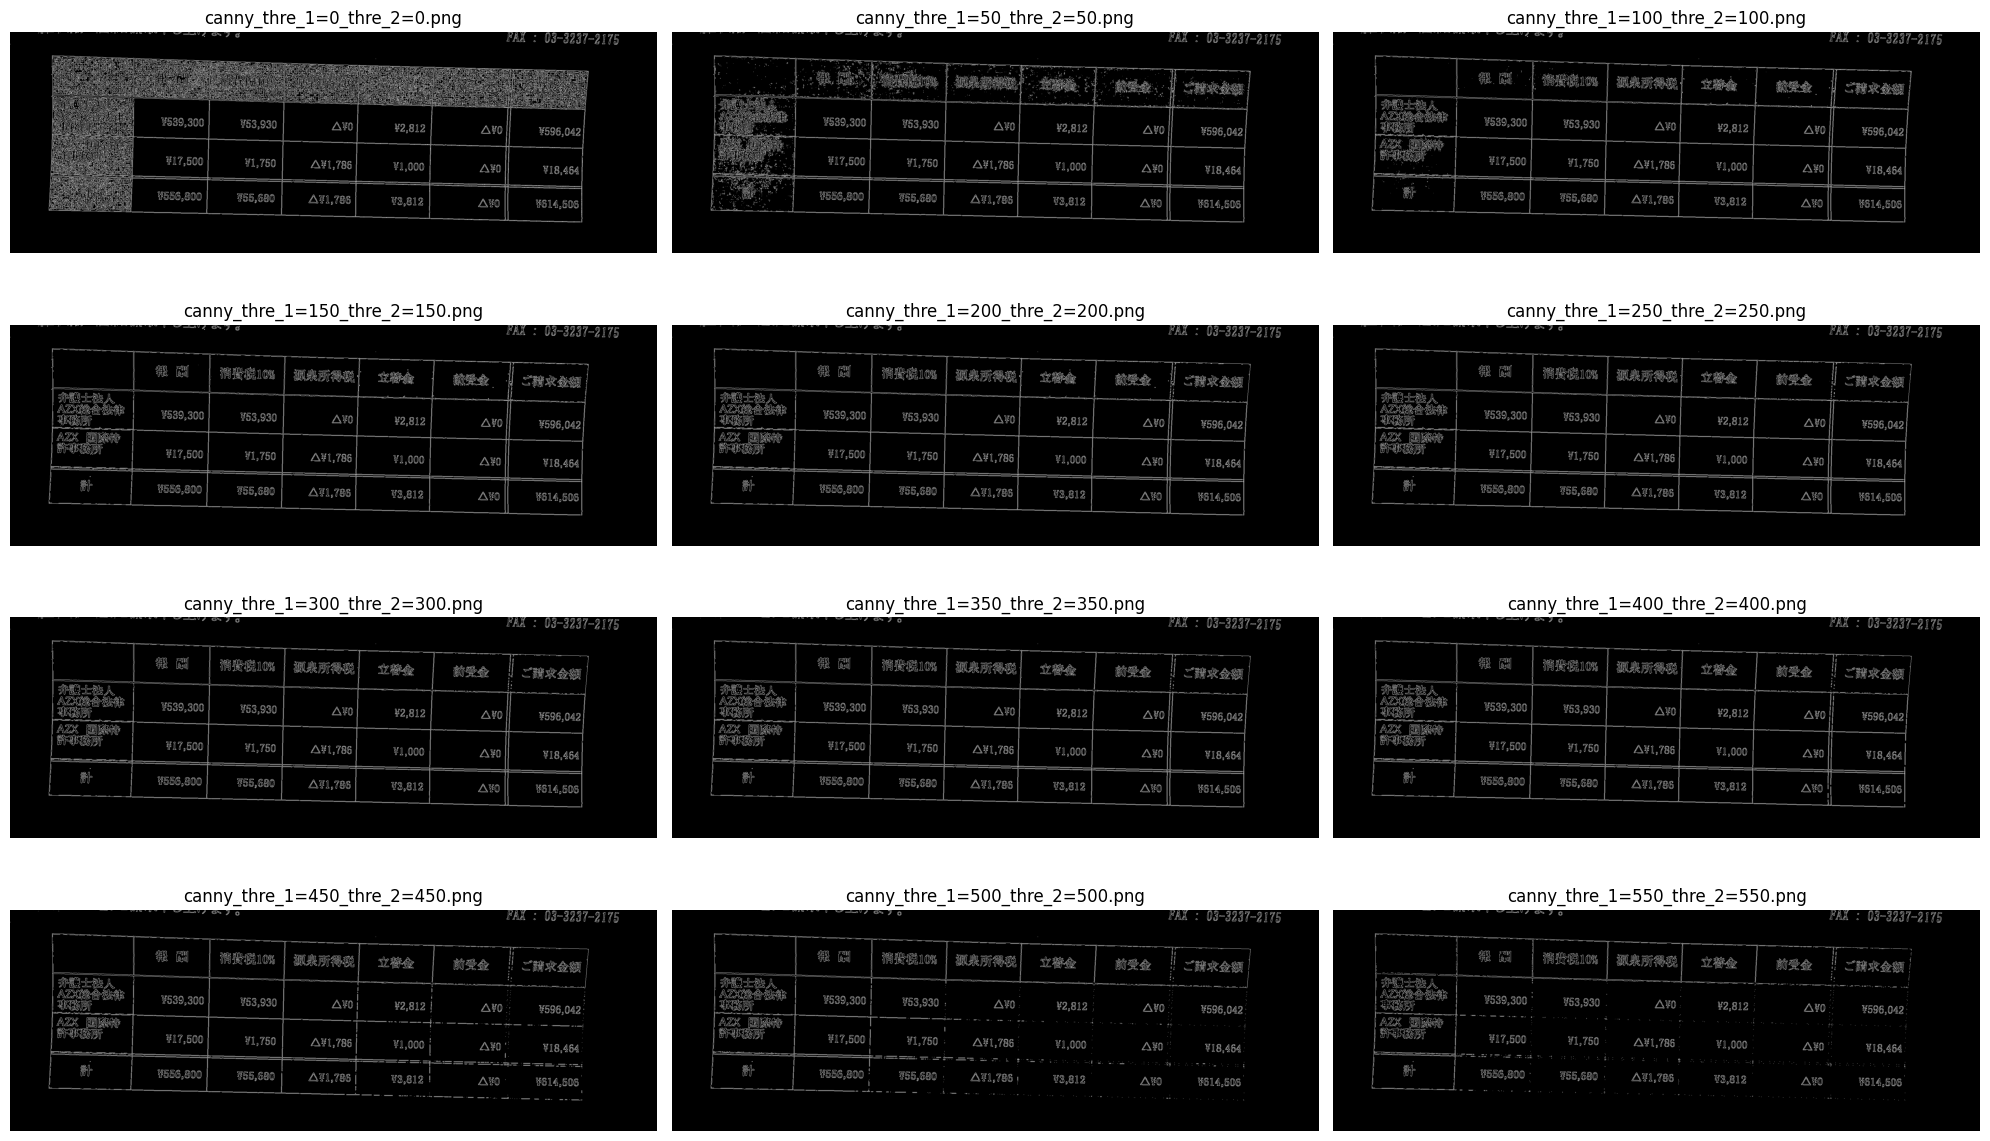

In [24]:
# thre_1, thre_2両方とも動かしてみる
plt.figure(figsize=[20, 15])
for i, thre in enumerate(np.arange(0, 600, 50)):
    thre_1 = thre
    thre_2 = thre
    edges = cv2.Canny(image=img,
                      threshold1=thre,
                      threshold2=thre,
                      apertureSize=3)
    file_name = f"canny_thre_1={thre}_thre_2={thre}.png"
    save_path = os.path.join('output', file_name)

    plt.subplot(5, 3, i+1)
    plt.title(file_name)
    plt.axis('off')
    plt.imshow(edges, 'gray')
    plt.imsave(save_path, edges)
plt.tight_layout()
plt.show()

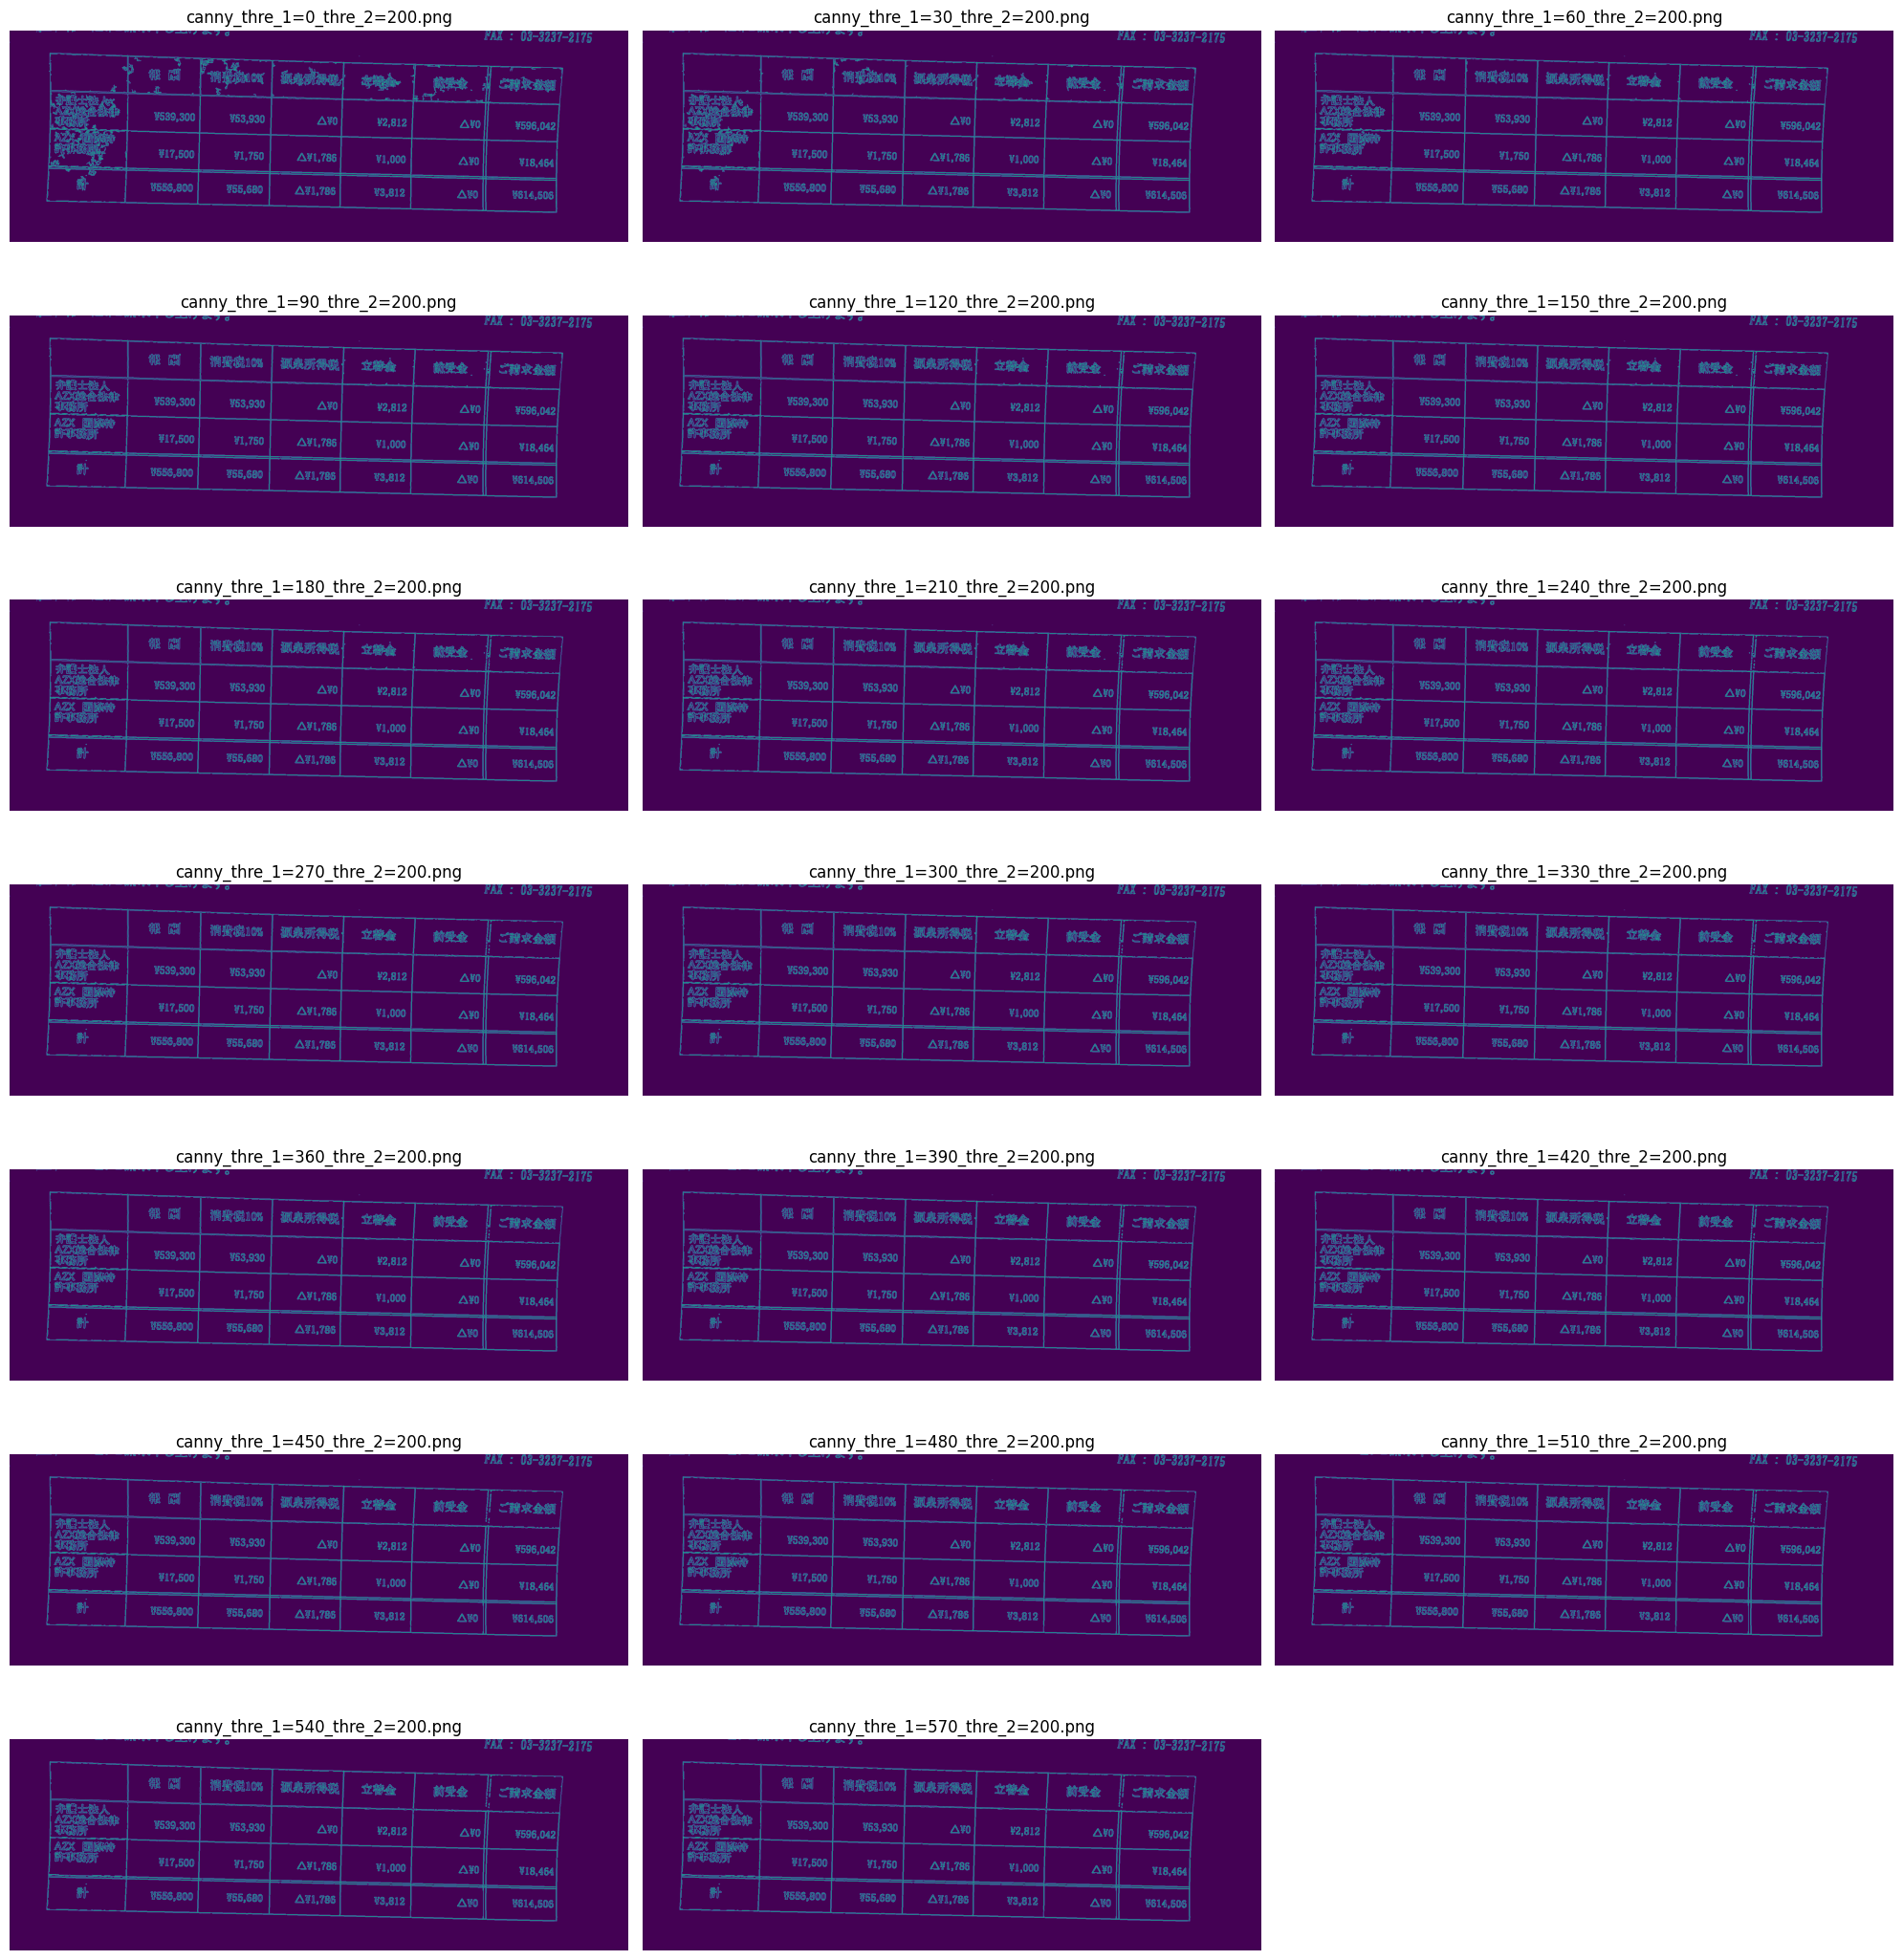

In [25]:
# thre_1だけ動かしてみる
plt.figure(figsize=[20, 24])
for i, thre in enumerate(np.arange(0, 600, 30)):
    thre_1 = thre
    thre_2 = 200
    edges = cv2.Canny(image=img,
                      threshold1=thre_1,
                      threshold2=thre_2,
                      apertureSize=3)
    file_name = f"canny_thre_1={thre_1}_thre_2={thre_2}.png"
    save_path = os.path.join('output', file_name)

    plt.subplot(8, 3, i+1)
    plt.title(file_name)
    plt.axis('off')
    plt.imshow(edges, 'gray')
    plt.imsave(save_path, edges)
plt.tight_layout()
plt.show()

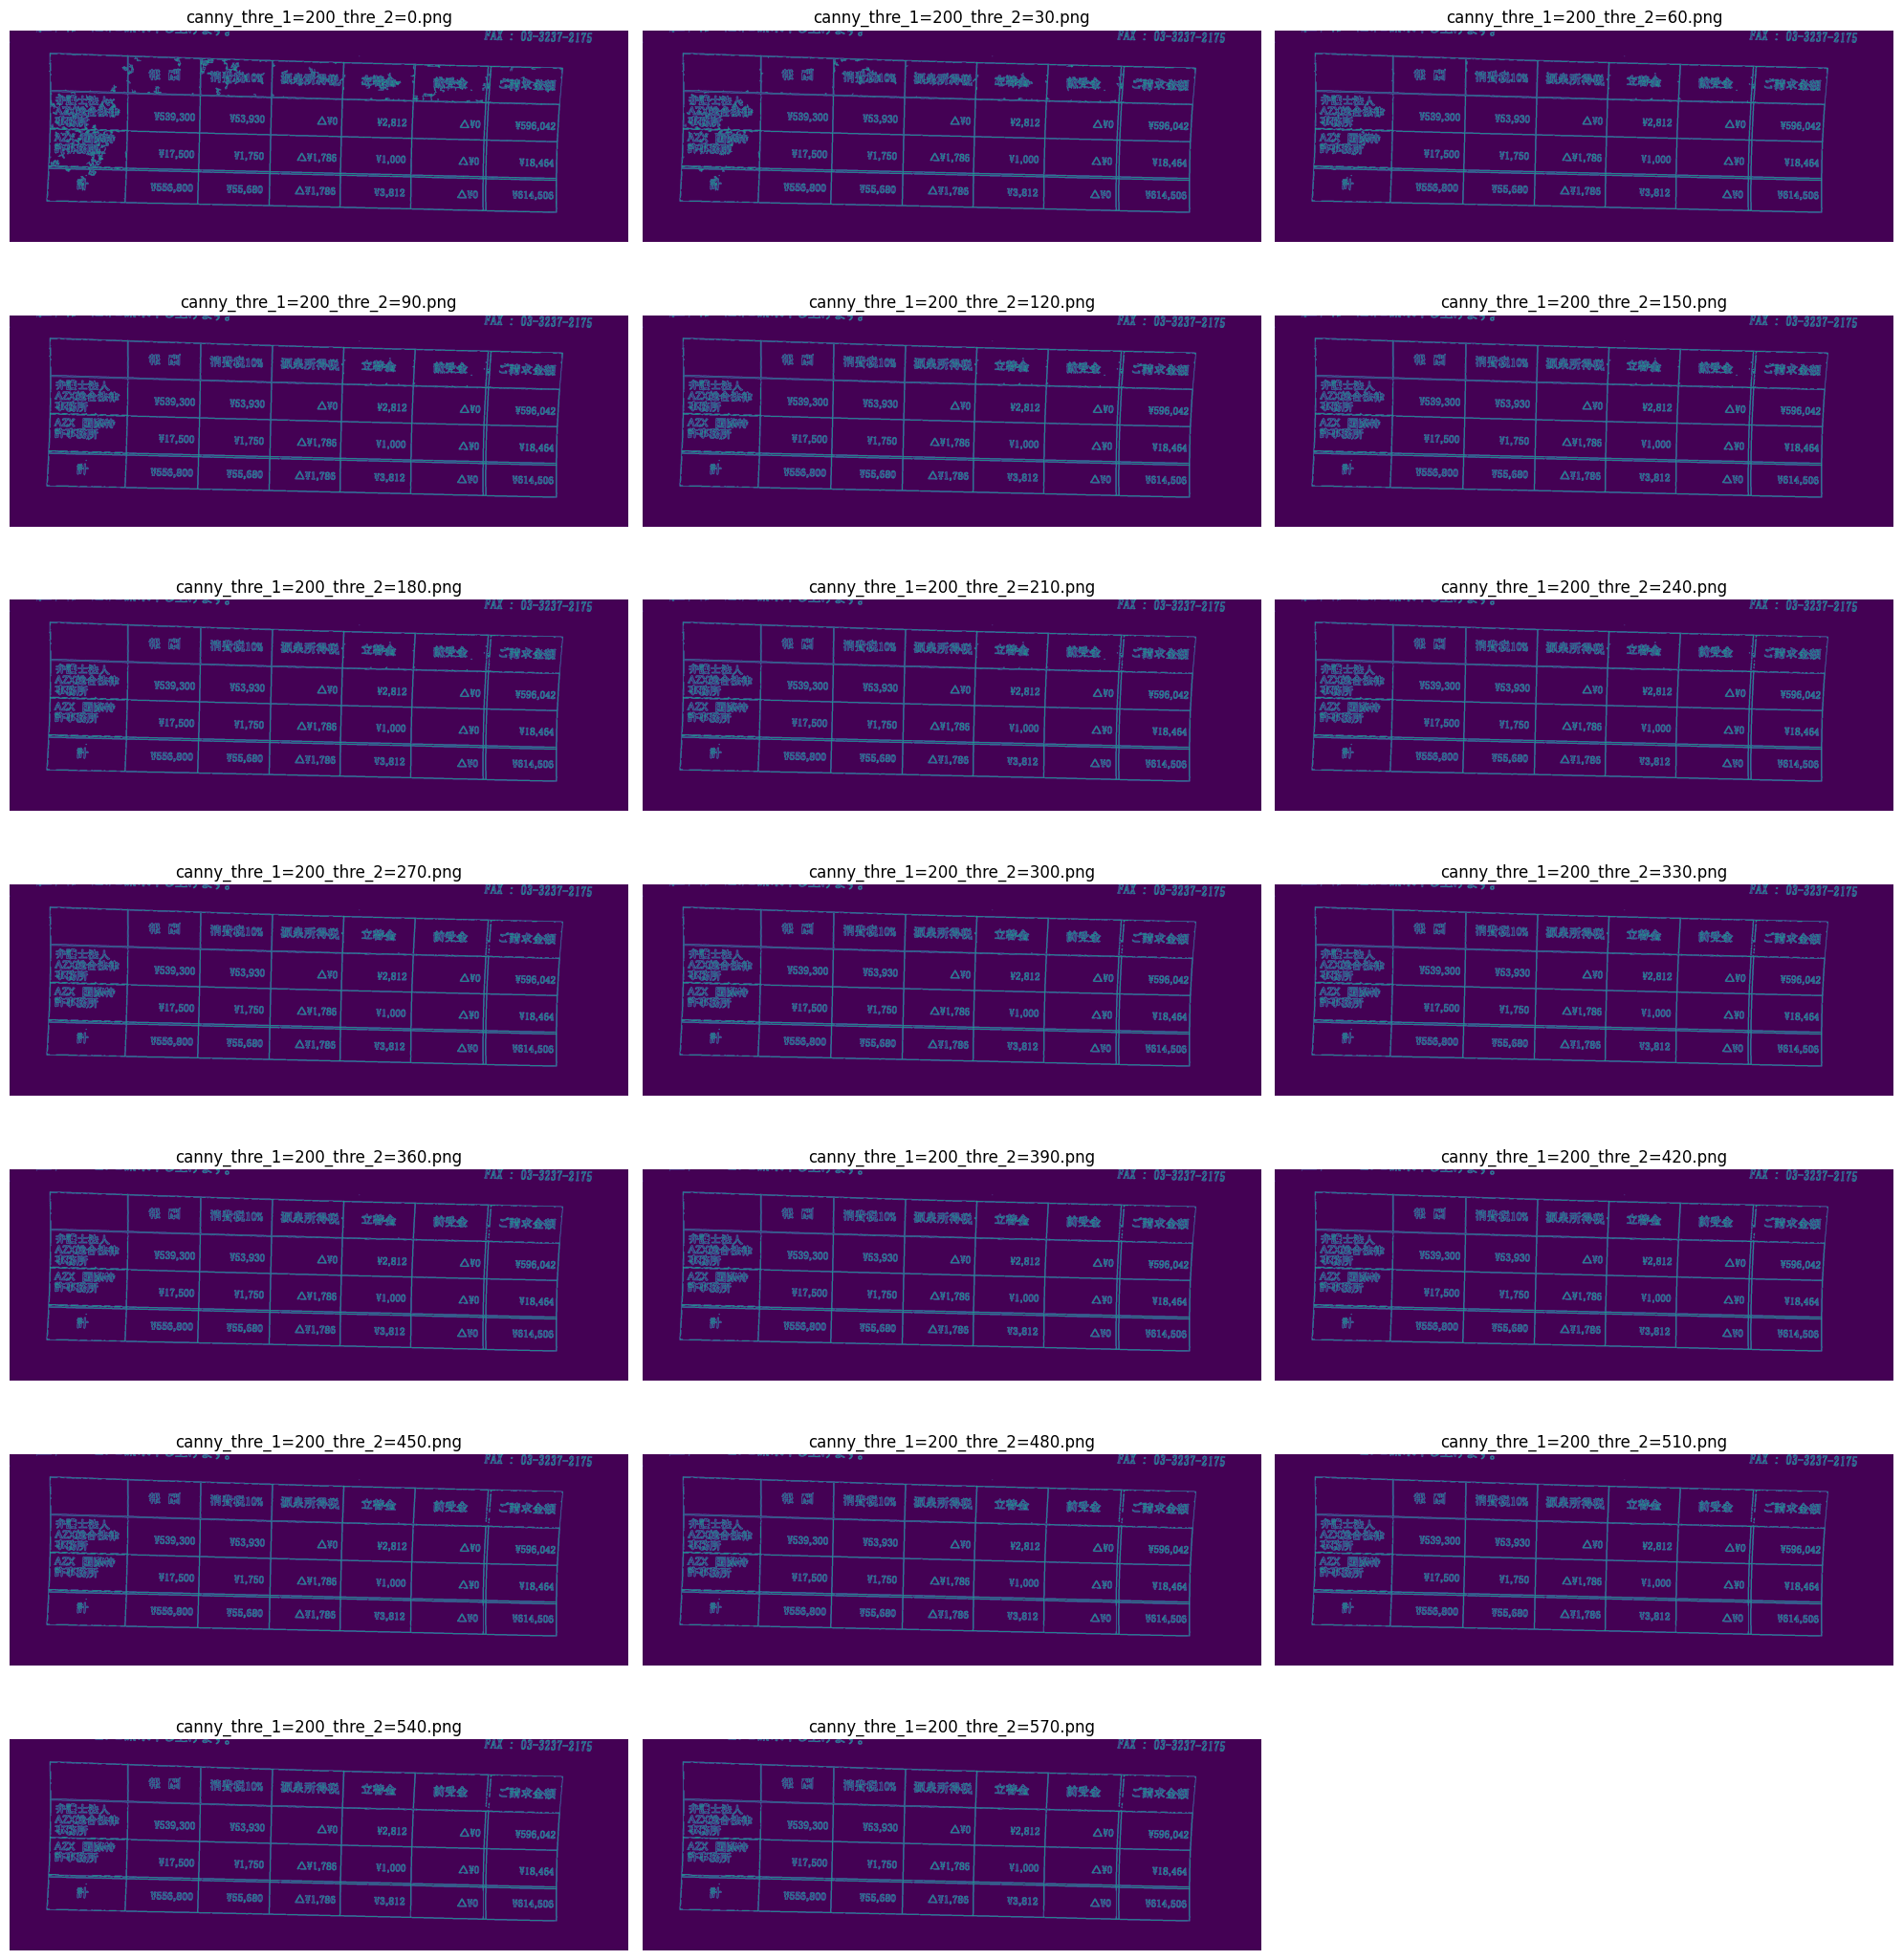

In [26]:
# thre_2だけ動かしてみる
plt.figure(figsize=[20, 24])
for i, thre in enumerate(np.arange(0, 600, 30)):
    thre_1 = 200
    thre_2 = thre
    edges = cv2.Canny(image=img,
                      threshold1=thre_1,
                      threshold2=thre_2,
                      apertureSize=3)
    file_name = f"canny_thre_1={thre_1}_thre_2={thre_2}.png"
    save_path = os.path.join('output', file_name)

    plt.subplot(8, 3, i+1)
    plt.title(file_name)
    plt.axis('off')
    plt.imshow(edges, 'gray')
    plt.imsave(save_path, edges)
plt.tight_layout()
plt.show()

In [14]:
もっとも線を検知できていそうなパラメータは
文字情報だけを検知できていそうなパラメータは、thre_1=200, thre_2=200

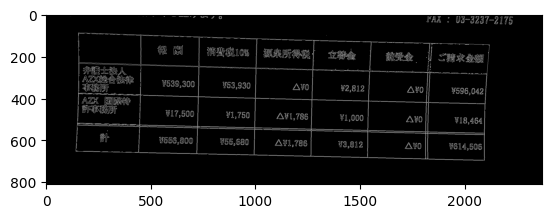

In [28]:
edges = cv2.Canny(image=img,
                  threshold1=200,
                  threshold2=200,
                  apertureSize=3)
plt.imshow(edges, 'gray')

In [ ]:
# plt.figure(figsize=[20, 24])
# for i, thre_1 in enumerate(np.arange(0, 600, 100)):
#     for j, thre_2 in enumerate(np.arange(0, 600, 100)):
#         edges = cv2.Canny(image=img,
#                           threshold1=thre_1,
#                           threshold2=thre_2,
#                           apertureSize=3)
#         file_name = f"canny_thre_1={thre_1}_thre_2={thre_2}.png"
#         save_path = os.path.join('output', file_name)
        
#         plt.subplot(12, 3, 6*i+j+1)
#         plt.title(file_name)
#         plt.axis('off')
#         plt.imshow(edges)
#         # plt.imsave(save_path, edges)
#         # plt.show()
# plt.show()